<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/analise_pib_mercosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import requests
import pandas as pd

# Definindo os países
countries = ['BRA', 'ARG', 'PRY', 'URY', 'PER', 'BOL', 'CHL']
indicator = 'NY.GDP.MKTP.CD'
base_url = 'http://api.worldbank.org/v2/country/{}/indicator/{}?format=json'

# Função para obter dados de um país
def get_country_data(country_code, indicator):
    url = base_url.format(country_code, indicator)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[1]
        return data
    else:
        print(f"Erro ao obter dados para {country_code}")
        return None

# Coletando dados para todos os países
data_frames = []
for country in countries:
    country_data = get_country_data(country, indicator)
    if country_data:
        df = pd.DataFrame(country_data)
        df['country'] = country
        data_frames.append(df)

# Concatenando os dados em um único DataFrame
gdp_data = pd.concat(data_frames, ignore_index=True)

# Selecionando as colunas relevantes
gdp_data = gdp_data[['country', 'date', 'value']]

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Exibindo os dados tratados
print(gdp_data.head())

# Opcional: salvar os dados em um arquivo CSV para visualização
gdp_data.to_csv('gdp_data.csv', index=False)

  country       date         value
0     BRA 2023-01-01           NaN
1     BRA 2022-01-01  1.920096e+12
2     BRA 2021-01-01  1.649623e+12
3     BRA 2020-01-01  1.476107e+12
4     BRA 2019-01-01  1.873288e+12


In [24]:
# prompt: organize os dados tendo a data como index os pib's dos países organizados por colunas.

gdp_pivoted = gdp_data.pivot_table(values='value', index='date', columns='country')
print(gdp_pivoted.head())


country     ARG           BOL  BRA           CHL  PER           PRY  \
date                                                                  
1974-01-01  NaN  2.101300e+09  NaN  1.620969e+10  NaN  1.333475e+09   
1975-01-01  NaN  2.405900e+09  NaN  7.621570e+09  NaN  1.511421e+09   
1976-01-01  NaN  2.733350e+09  NaN  1.033862e+10  NaN  1.698960e+09   
1977-01-01  NaN  3.229050e+09  NaN  1.396560e+10  NaN  2.092159e+09   
1978-01-01  NaN  3.760100e+09  NaN  1.599204e+10  NaN  2.559857e+09   

country              URY  
date                      
1974-01-01  4.091439e+09  
1975-01-01  3.538014e+09  
1976-01-01  3.667717e+09  
1977-01-01  4.114375e+09  
1978-01-01  4.910526e+09  


In [35]:
# prompt: dados faltantes tratados com dados anteriores ou posteriores.

# Filling missing values with previous values
gdp_pivoted.fillna(method='pad', inplace=True)

# Filling missing values with subsequent values
gdp_pivoted.fillna(method='bfill', inplace=True)

print(gdp_pivoted.tail())


country              ARG           BOL           BRA           CHL  \
date                                                                 
2018-01-01  5.248199e+11  4.028765e+10  1.916934e+12  2.958576e+11   
2019-01-01  4.477547e+11  4.089532e+10  1.873288e+12  2.785989e+11   
2020-01-01  3.857405e+11  3.662984e+10  1.476107e+12  2.542582e+11   
2021-01-01  4.879026e+11  4.040611e+10  1.649623e+12  3.165812e+11   
2022-01-01  6.311334e+11  4.400828e+10  1.920096e+12  3.010247e+11   

country              PER           PRY           URY  
date                                                  
2018-01-01  2.225970e+11  4.022545e+10  6.520307e+10  
2019-01-01  2.283258e+11  3.792534e+10  6.204859e+10  
2020-01-01  2.019476e+11  3.543218e+10  5.366691e+10  
2021-01-01  2.237178e+11  3.995090e+10  6.141227e+10  
2022-01-01  2.426316e+11  4.172230e+10  7.117715e+10  


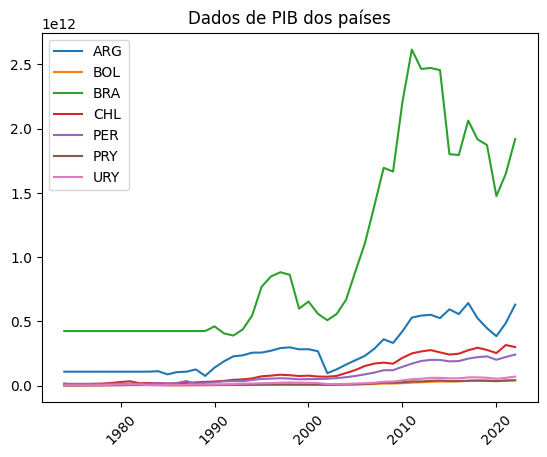

In [8]:
# prompt: Plote um gráfico temporal dos dados de cada pais, sendo que as datas no eixo "x" devem ser organizadas de forma a facilitar a sua visualização.

import matplotlib.pyplot as plt

# Plotando o gráfico temporal para cada país
for country in gdp_pivoted.columns:
  plt.plot(gdp_pivoted.index, gdp_pivoted[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título e legenda
plt.title("Dados de PIB dos países")
plt.legend()

# Mostrando o gráfico
plt.show()


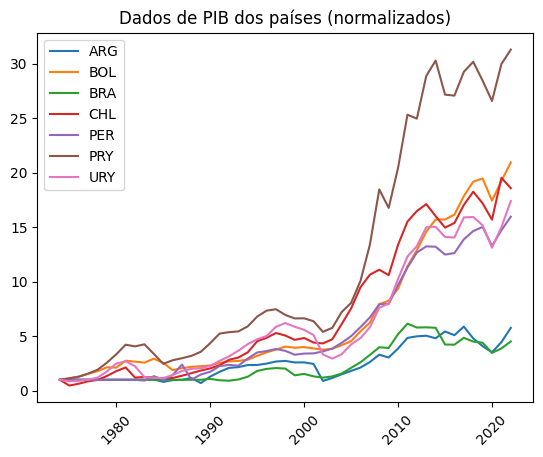

In [26]:
# prompt: Faça um novo gráfico normalizando os dados na base 1.
import matplotlib.pyplot as plt

# Normalizando os dados na base 1
gdp_normalized = gdp_pivoted.div(gdp_pivoted.iloc[0])

# Plotando o gráfico temporal para cada país
for country in gdp_normalized.columns:
  plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título e legenda
plt.title("Dados de PIB dos países (normalizados)")
plt.legend()

# Mostrando o gráfico
plt.show()


In [34]:
gdp_normalized

country,ARG,BOL,BRA,CHL,PER,PRY,URY
date,,,,,,,
1974-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1975-01-01,1.000000,1.144958,1.000000,0.470186,1.000000,1.133445,0.864736
1976-01-01,1.000000,1.300790,1.000000,0.637805,1.000000,1.274084,0.896437
1977-01-01,1.000000,1.536692,1.000000,0.861558,1.000000,1.568952,1.005606
1978-01-01,1.000000,1.789416,1.000000,0.986573,1.000000,1.919688,1.200195
1979-01-01,1.000000,2.146528,1.000000,1.345253,1.000000,2.562310,1.755247
1980-01-01,1.000000,2.117912,1.000000,1.791318,1.000000,3.335710,2.483835
1981-01-01,1.000000,2.749959,1.000000,2.128966,1.000000,4.217937,2.700430
1982-01-01,1.000000,2.665200,1.000000,1.204791,1.000000,4.064126,2.243465


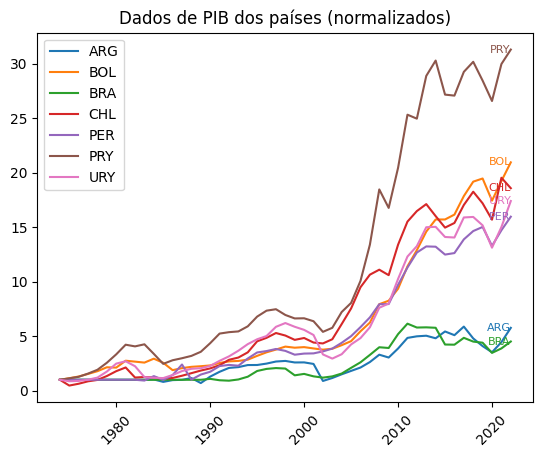

In [33]:
import matplotlib.pyplot as plt

# Plotando o gráfico temporal para cada país
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados de PIB dos países (normalizados)")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='right', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Removendo a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()


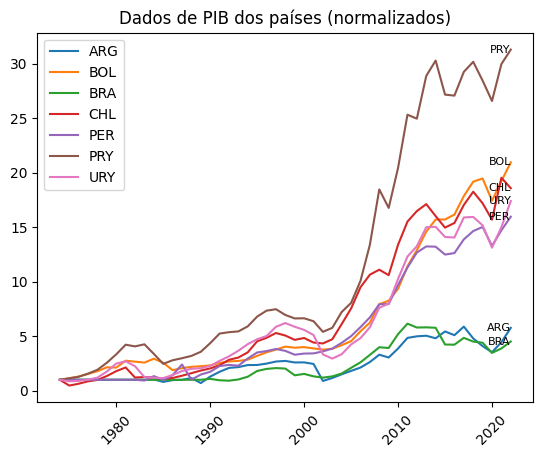

In [32]:
import matplotlib.pyplot as plt

# Supondo que gdp_normalized é o DataFrame com os dados normalizados

# Plotando o gráfico temporal para cada país
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

    # Adicionando a legenda do país na posição final da linha, com um deslocamento para evitar sobreposição
    plt.text(gdp_normalized.index[-1], gdp_normalized[country].iloc[-1], country,
             ha='right', va='center', fontsize=8)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título e removendo a legenda duplicada
plt.title("Dados de PIB dos países (normalizados)")

# Removendo a legenda automática para evitar duplicação
plt.legend()

# Mostrando o gráfico
plt.show()
